### Reynor-Teo Strategy
---

1. Buy when S&P 500 > 200 day MA
1. Entry: 10 period RSI < 30 (buy on next day's open)
1. Entry: 10 period RSI > 40 or after 10 trading days (sell on next day's open)

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

%matplotlib inline

In [3]:
sp500 = yf.download("^GSPC", start="1996-01-01", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000
...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000


In [17]:
# Calculate the 200 day moving average
df = sp500.copy()
df['MA_200'] = df['Adj Close'].rolling(window=200).mean()
df

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown
Date,,,,,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,NaN,-0.001379,0.000000,0.001379,0.000000,0.001379
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,NaN,0.002619,0.002619,0.000000,0.001378,0.000653
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,NaN,0.003663,0.003663,0.000000,0.002221,0.000412
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,NaN,0.005417,0.005417,0.000000,0.003151,0.000292
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,NaN,-0.001365,0.000000,0.001365,0.002381,0.000554
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,4496.293240,0.005698,0.005698,0.000000,0.003770,0.006777
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,4495.246091,-0.028146,0.000000,0.028146,0.003393,0.008914
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,4494.319841,0.002098,0.002098,0.000000,0.003264,0.008022


In [18]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown
Date,,,,,,,,,,,,
1997-07-30,942.289978,953.979980,941.979980,952.289978,952.289978,568470000,797.264651,0.010612,0.010612,0.000000,0.005314,0.002100
1997-07-31,952.289978,957.729980,948.890015,954.309998,954.309998,547830000,798.523351,0.002121,0.002121,0.000000,0.004995,0.001890
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.004495,0.002452
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.004379,0.002207
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.004159,0.001986
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,4496.293240,0.005698,0.005698,0.000000,0.003770,0.006777
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,4495.246091,-0.028146,0.000000,0.028146,0.003393,0.008914
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,4494.319841,0.002098,0.002098,0.000000,0.003264,0.008022


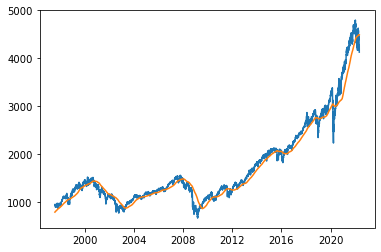

In [19]:
plt.plot(df['Adj Close'])
plt.plot(df['MA_200'])
plt.show()

Condition 1: Buy if Price > 200 day MA

In [20]:
# Get the daily returns
df['price_change'] = df['Adj Close'].pct_change()
df = df.dropna()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown
Date,,,,,,,,,,,,
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,4496.293240,0.005698,0.005698,0.000000,0.003770,0.006777
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,4495.246091,-0.028146,0.000000,0.028146,0.003393,0.008914
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,4494.319841,0.002098,0.002098,0.000000,0.003264,0.008022
2022-04-28,4222.580078,4308.450195,4188.629883,4287.500000,4287.500000,3969440000,4493.885842,0.024747,0.024747,0.000000,0.005412,0.007220
2022-04-29,4253.750000,4269.680176,4124.279785,4131.930176,4131.930176,3943480000,4492.745344,-0.036285,0.000000,0.036285,0.004871,0.010126


#### RSI Calculation
---

In [21]:
df['UpMove'] = df['price_change'].apply(lambda x: x if x > 0 else 0)
df['DownMove'] = df['price_change'].apply(lambda x: abs(x) if x < 0 else 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown
Date,,,,,,,,,,,,
1997-07-31,952.289978,957.729980,948.890015,954.309998,954.309998,547830000,798.523351,0.002121,0.002121,0.000000,0.004995,0.001890
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.004495,0.002452
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.004379,0.002207
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.004159,0.001986
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.004578,0.001788


In [22]:
# Wilder's Smoothing Method: Uses EMA span = 19 so that it matches the alpha = 1/N of Wilder
df['AvgUp'] = df['UpMove'].ewm(span=19).mean()
df['AvgDown'] = df['DownMove'].ewm(span=19).mean()
df = df.dropna()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown
Date,,,,,,,,,,,,
1997-07-31,952.289978,957.729980,948.890015,954.309998,954.309998,547830000,798.523351,0.002121,0.002121,0.000000,0.002121,0.000000
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.001005,0.003954
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.001865,0.002495
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.001956,0.001770
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.003517,0.001337
1997-08-07,960.320007,964.169983,950.869995,951.190002,951.190002,576030000,804.636751,-0.009507,0.000000,0.009507,0.002766,0.003081
1997-08-08,951.190002,951.190002,925.739990,933.539978,933.539978,563420000,805.768101,-0.018556,0.000000,0.018556,0.002236,0.006047
1997-08-11,933.539978,938.500000,925.390015,937.000000,937.000000,480340000,806.941651,0.003706,0.003706,0.000000,0.002494,0.004985
1997-08-12,937.000000,942.989990,925.659973,926.530029,926.530029,499310000,808.069702,-0.011174,0.000000,0.011174,0.002087,0.005996


In [23]:
# Calculate RSI
df['RS'] = df['AvgUp'].div(df['AvgDown'])
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown,RS
Date,,,,,,,,,,,,,
1997-07-31,952.289978,957.729980,948.890015,954.309998,954.309998,547830000,798.523351,0.002121,0.002121,0.000000,0.002121,0.000000,inf
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.001005,0.003954,0.254097
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.001865,0.002495,0.747496
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.001956,0.001770,1.105426
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.003517,0.001337,2.629499


In [25]:
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown,RS,RSI
Date,,,,,,,,,,,,,,
1997-07-31,952.289978,957.729980,948.890015,954.309998,954.309998,547830000,798.523351,0.002121,0.002121,0.000000,0.002121,0.000000,inf,100.000000
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.001005,0.003954,0.254097,20.261377
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.001865,0.002495,0.747496,42.775267
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.001956,0.001770,1.105426,52.503666
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.003517,0.001337,2.629499,72.447989


In [26]:
df.loc[(df['Adj Close'] > df['MA_200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
1997-07-31,952.289978,957.729980,948.890015,954.309998,954.309998,547830000,798.523351,0.002121,0.002121,0.000000,0.002121,0.000000,inf,100.000000,NaN
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.001005,0.003954,0.254097,20.261377,Yes
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.001865,0.002495,0.747496,42.775267,NaN
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.001956,0.001770,1.105426,52.503666,NaN
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.003517,0.001337,2.629499,72.447989,NaN


In [27]:
df.loc[(df['Adj Close'] < df['MA_200']) | (df['RSI'] > 30), 'Buy'] = 'No'

In [28]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change,UpMove,DownMove,AvgUp,AvgDown,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
1997-07-31,952.289978,957.729980,948.890015,954.309998,954.309998,547830000,798.523351,0.002121,0.002121,0.000000,0.002121,0.000000,inf,100.000000,No
1997-08-01,954.289978,955.349976,939.039978,947.140015,947.140015,513750000,799.737001,-0.007513,0.000000,0.007513,0.001005,0.003954,0.254097,20.261377,Yes
1997-08-04,947.140015,953.179993,943.599976,950.299988,950.299988,456000000,800.953551,0.003336,0.003336,0.000000,0.001865,0.002495,0.747496,42.775267,No
1997-08-05,950.299988,954.210022,948.919983,952.369995,952.369995,525710000,802.161301,0.002178,0.002178,0.000000,0.001956,0.001770,1.105426,52.503666,No
1997-08-06,952.369995,962.429993,949.450012,960.320007,960.320007,565200000,803.413651,0.008348,0.008348,0.000000,0.003517,0.001337,2.629499,72.447989,No
1997-08-07,960.320007,964.169983,950.869995,951.190002,951.190002,576030000,804.636751,-0.009507,0.000000,0.009507,0.002766,0.003081,0.897850,47.308788,No
1997-08-08,951.190002,951.190002,925.739990,933.539978,933.539978,563420000,805.768101,-0.018556,0.000000,0.018556,0.002236,0.006047,0.369770,26.995052,Yes
1997-08-11,933.539978,938.500000,925.390015,937.000000,937.000000,480340000,806.941651,0.003706,0.003706,0.000000,0.002494,0.004985,0.500303,33.346815,No
1997-08-12,937.000000,942.989990,925.659973,926.530029,926.530029,499310000,808.069702,-0.011174,0.000000,0.011174,0.002087,0.005996,0.348096,25.821283,Yes


In [29]:
# Calculate PnL

PnL = []

for i in range(len(df) - 12):
    # Buying point
    if "Yes" in df['Buy'].iloc[i]:
        # Day 1 to Day 10 from buying point
        for j in range(1,11):
            # i + j to account for days from buying point
            if df['RSI'].iloc[i + j] > 40:
                # Append PnL to empty list. 
                # Next day's open == next row, so use i+j+1
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                # Break the loop to stop checking for wrong numbers
                break
            elif j == 10:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])

In [30]:
PnL

[3.15997314453125,
 -7.52996826171875,
 -0.52001953125,
 3.989990234375,
 1.239990234375,
 25.20001220703125,
 44.8599853515625,
 11.550048828125,
 2.239990234375,
 14.6900634765625,
 20.3599853515625,
 22.35009765625,
 27.3900146484375,
 29.8800048828125,
 46.25,
 34.2999267578125,
 16.969970703125,
 6.4400634765625,
 9.7000732421875,
 8.8800048828125,
 9.989990234375,
 16.050048828125,
 2.4599609375,
 10.89990234375,
 5.679931640625,
 10.64990234375,
 14.2999267578125,
 3.25,
 -1.27001953125,
 14.780029296875,
 27.8299560546875,
 8.68994140625,
 26.780029296875,
 29.3499755859375,
 34.1199951171875,
 20.0400390625,
 1.5599365234375,
 3.239990234375,
 8.239990234375,
 16.5599365234375,
 15.6500244140625,
 28.6300048828125,
 -7.1099853515625,
 0.469970703125,
 6.4300537109375,
 26.199951171875,
 35.52001953125,
 13.1099853515625,
 14.8900146484375,
 7.8800048828125,
 13.7099609375,
 32.1900634765625,
 3.6300048828125,
 6.81005859375,
 23.080078125,
 32.27001953125,
 45.2099609375,
 29.

In [31]:
# Succesful trades
[i for i in PnL if i > 0]

[3.15997314453125,
 3.989990234375,
 1.239990234375,
 25.20001220703125,
 44.8599853515625,
 11.550048828125,
 2.239990234375,
 14.6900634765625,
 20.3599853515625,
 22.35009765625,
 27.3900146484375,
 29.8800048828125,
 46.25,
 34.2999267578125,
 16.969970703125,
 6.4400634765625,
 9.7000732421875,
 8.8800048828125,
 9.989990234375,
 16.050048828125,
 2.4599609375,
 10.89990234375,
 5.679931640625,
 10.64990234375,
 14.2999267578125,
 3.25,
 14.780029296875,
 27.8299560546875,
 8.68994140625,
 26.780029296875,
 29.3499755859375,
 34.1199951171875,
 20.0400390625,
 1.5599365234375,
 3.239990234375,
 8.239990234375,
 16.5599365234375,
 15.6500244140625,
 28.6300048828125,
 0.469970703125,
 6.4300537109375,
 26.199951171875,
 35.52001953125,
 13.1099853515625,
 14.8900146484375,
 7.8800048828125,
 13.7099609375,
 32.1900634765625,
 3.6300048828125,
 6.81005859375,
 23.080078125,
 32.27001953125,
 45.2099609375,
 29.60986328125,
 31.119873046875,
 46.1298828125,
 29.329833984375,
 9.90991

In [32]:
# Winning rate
len([i for i in PnL if i > 0])/len(PnL)

0.922077922077922